In [1]:
import os
import cv2 
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image,ImageDraw,ImageEnhance
import json

In [127]:
pwd

'C:\\Users\\Hassan Lodhi\\Desktop\\Programmer-Force\\dest'

In [116]:
#1. Fetch an image and data from VGG formatted JSON annotations
with open('annotations.json') as f:
    data = json.load(f)

In [117]:
print(data.keys())

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])


In [118]:
image_data = data

image_data

{'info': {'year': 2023,
  'version': '1',
  'description': 'ML1',
  'contributor': 'ML1',
  'url': 'ml1.ai',
  'date_created': 'Mon Mar 06 2023 00:00:00 GMT+0500 (Pakistan Standard Time)'},
 'licenses': [{'id': 1, 'name': 'Unknown', 'url': ''}],
 'images': [{'id': 0,
   'width': 556,
   'height': 417,
   'file_name': '1_0_1.06_76.png',
   'license': 1,
   'date_captured': ''},
  {'id': 1,
   'width': 628,
   'height': 494,
   'file_name': '1_5_1.4_81.png',
   'license': 1,
   'date_captured': ''},
  {'id': 2,
   'width': 539,
   'height': 440,
   'file_name': '1_10_1.64_66.png',
   'license': 1,
   'date_captured': ''},
  {'id': 3,
   'width': 772,
   'height': 654,
   'file_name': '1_15_1.41_91.png',
   'license': 1,
   'date_captured': ''},
  {'id': 4,
   'width': 700,
   'height': 613,
   'file_name': '1_20_1.7_80.png',
   'license': 1,
   'date_captured': ''},
  {'id': 5,
   'width': 832,
   'height': 750,
   'file_name': '1_25_1.81_93.png',
   'license': 1,
   'date_captured': ''}

In [119]:
image = cv2.imread('2_0_2.0_97.png')

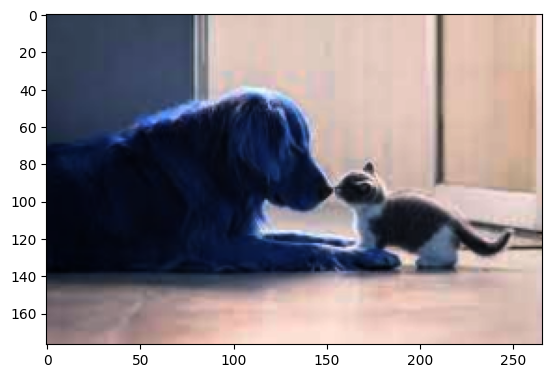

In [122]:
#2. Load that image
plt.imshow(image)

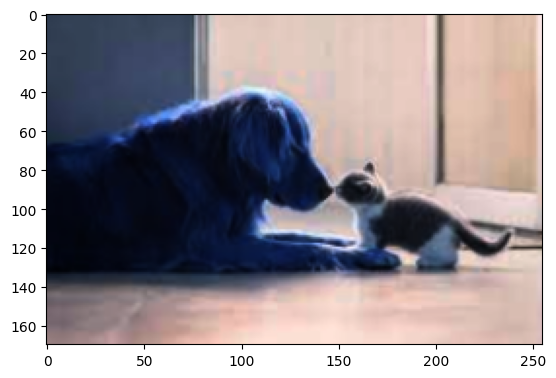

In [123]:
#3. Resize that image from resize scale percentage 60 to 100 randomly. Thats mean the resulting images will 
#be between 60% to 100% of original size. Do forget to adjust the bounding boxes according to new resized image.

# Define the resize scale randomly between 60% and 100%
resize_scale = random.randint(60, 100) / 100

# Resize the image
img_resized = cv2.resize(image, None, fx=resize_scale, fy=resize_scale)

# Load the bounding boxes of the original image
bounding_boxes = [(10, 20, 50, 60), (30, 40, 70, 80)] # replace with your own bounding boxes

# Adjust the bounding boxes according to the new resized image
bounding_boxes_resized = []
for box in bounding_boxes:
    x, y, w, h = box
    x_resized, y_resized, w_resized, h_resized = int(x*resize_scale), int(y*resize_scale), int(w*resize_scale), int(h*resize_scale)
    bounding_boxes_resized.append((x_resized, y_resized, w_resized, h_resized))

plt.imshow(img_resized )   
    

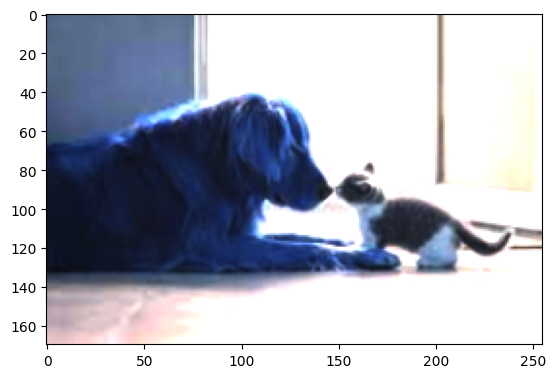

In [124]:
#4. Add random brightness to that resized image
alpha = 1.5 # Contrast control
beta = 10 # Brightness control

# call convertScaleAbs function
adjusted = cv2.convertScaleAbs(img_resized, alpha=alpha, beta=beta)

# display the output image
plt.imshow(adjusted)

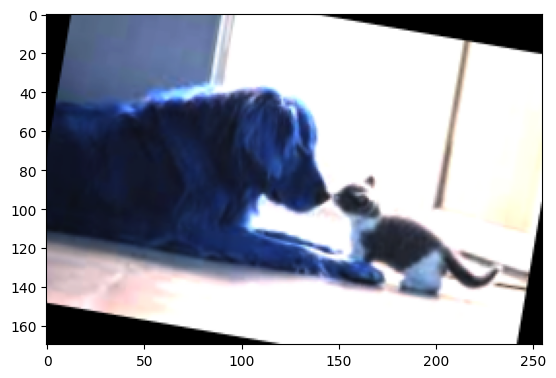

In [125]:
#5. Rotate that brighter image on an angle n. Don't forget to adjust bounding boxes according to the angle.
for i in range(0, 70):
    angle = 30 + i*5
    if angle > 350:
        break
    center = (adjusted.shape[1] / 2, adjusted.shape[0] / 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(adjusted, rotation_matrix, (adjusted.shape[1], adjusted.shape[0]))
plt.imshow(rotated_image)



In [126]:
#6 ANSWER
# simply just right clik on the file it wil aotomatically save the file


In [ ]:
#Basic Idea How to perform 7-8 and 9th task idea in the file

#range to rotate

for metadata in img_metadata:
    filename = metadata['filename']
    img = Image.open(filename)
    # Randomly adjust size between 60 to 100,so that resizing shoul be in between given ratio
    resize_percent = random.randint(60, 100)
    
    img_resized = img.resize((int(img.width * resize_percent / 100), int(img.height * resize_percent / 100)))
    brightness_enhancer = ImageEnhance.Brightness(img_resized)
    
    factor = random.uniform(0.9, 1.5) # adjust brightness factor between 0.9 and 1.5
    img_resized = brightness_enhancer.enhance(factor)
    
    angles = range(0, 360, 5)  
    
    for angle in angles:
        img_rotated = img_resized.rotate(angle, resample=Image.BILINEAR, expand=True)
        # transformation matrix so image rotate accordingly
        matrix = np.array([
            [np.cos(np.radians(angle)), -np.sin(np.radians(angle))],
            [np.sin(np.radians(angle)), np.cos(np.radians(angle))]
        ])
        # now we are going to Get the image center so that along image rotation bbox rotate accordingly as same axis
        center = np.array([img_rotated.width / 2, img_rotated.height / 2])
        
        # now transform the bounding box coordinates according to size of image
        for region in metadata['regions']:
            x = region['shape_attributes']['x'] * resize_percent / 100
            y = region['shape_attributes']['y'] * resize_percent / 100
            w = region['shape_attributes']['width'] * resize_percent / 100
            h = region['shape_attributes']['height'] * resize_percent / 100

            # Rotate the bounding box coordinates around the center as image
            points = np.array([[x, y], [x + w, y], [x + w, y + h], [x, y + h]])
            points = np.dot(points - center, matrix) + center

            # fixed the coordinates using np
            x, y = np.min(points, axis=0)
            w, h = np.max(points, axis=0) - np.min(points, axis=0)

            fig, data_img = plt.subplots(1)
            data_img.imshow(img_rotated)
            rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='b', facecolor='none')

            bbox_img =  data_img.add_patch(rect)
            
#             create folder to store augmented images in disk
            if not os.path.exists('imges_with_bbox'):
                os.mkdir('imges_with_bbox')

            #extract the labels
            label = list(region['region_attributes']['class'].keys())[0]
            plt.text(x, y-8, label, color='b')
            
#             set the file name and format of image we are going to store in disk
            image_name = os.path.splitext(os.path.basename(filename))[0]
            output_filename = f"{image_name}_angle{angle}_bbox.png"

            # Save the image with the bounding box to disk
            plt.savefig(os.path.join('imges_with_bbox', output_filename), bbox_inches='tight')
            

#         plt.show()

In [1]:
#SImple Idea how to save the file not 100% Granted the code will work
#To save the file in coco format 
angles = range(0, 360, 5)

# Loop through each image in the metadata
for i, metadata in enumerate(img_metadata):
    filename = metadata['filename']
    img = Image.open(filename)
    # Randomly adjust size between 60 to 100
    resize_percent = random.randint(60, 100)
    
    img_resized = img.resize((int(img.width * resize_percent / 100), int(img.height * resize_percent / 100)))
    enhancer = ImageEnhance.Brightness(img_resized)
    factor = random.uniform(0.9, 1.5) # adjust brightness factor between 0.9 and 1.5
    img_resized = enhancer.enhance(factor)

images = []
annotations = []
image_id = 1
annotation_id = 1
for id in metadata:
    image_data = metadata[id]
    file_name = f"{id}_rotated.png"
    for angle in angles:
        img_rotated = img_resized.rotate(angle, resample=Image.BILINEAR, expand=True)
        # Get the transformation matrix
        matrix = np.array([
            [np.cos(np.radians(angle)), -np.sin(np.radians(angle))],
            [np.sin(np.radians(angle)), np.cos(np.radians(angle))]
        ])
        # Get the image center
        center = np.array([img_rotated.width / 2, img_rotated.height / 2])
        categories = [{"id": v, "name": k, "supercategory": "class"} for k, v in classes.items()]

        height, width = img_rotated.size
        images.append(
            {
                "id": image_id,
                "width": width,
                "height": height,
                "file_name": file_name,
                "license": 1,
                "data_captured": ""
            }
        )
        # Transform the bounding box coordinates
        for region in metadata['regions']:
            x = region['shape_attributes']['x'] * resize_percent / 100
            y = region['shape_attributes']['y'] * resize_percent / 100
            w = region['shape_attributes']['width'] * resize_percent / 100
            h = region['shape_attributes']['height'] * resize_percent / 100
            # Rotate the bounding box coordinates around the center
            points = np.array([[x, y], [x + w, y], [x + w, y + h], [x, y + h]])
            points = np.dot(points - center, matrix) + center
            # Calculate the new bounding box dimensions
            x, y = np.min(points, axis=0)
            w, h = np.max(points, axis=0) - np.min(points, axis=0)
            
            # Save the image and annotation
            category = tuple(region['region_attributes']['class'])[0]
            category_id = classes[category]
            
            x1, y1 = x, y

            x2, y2 = x + w, y 

            x3, y3= x+w, y+h

            x4, y4 = x, y+h
        
            segmentations = [x1,y1,x2,y2,x3,y3,x4,y4]
            annotation = {
                "id": annotation_id,
                "category_id": category_id,
                "image_id": image_id,
                "segmentation": segmentations,
                "area": w * h,
                "bbox": [x, y, w, h],
                "iscrowd": 0
            }
            annotations.append(annotation)
            annotation_id += 1
        image_id += 1
        img_rotated.save(os.path.join(output_dir, file_name))
        coco = {
            "info": {
                "year": 2023,
                "version": "1",
                "description": "PF1",
                "contributor": "Abdul Manan from PF1",
                "url": "ml1.ai",
                "date_created": "Tuesday Mar 28 2023 00:00:00 GMT+0500 (Pakistan Standard Time)"
            },
            "licenses": [
                {
                    "id": 1,
                    "name": "Unknown",
                    "url": ""
                }
            ],
            "images": images,
            "annotations": annotations,
            "categories": categories
        }

        with open("coco_annotations_file.json", "w") as f:
            json.dump(coco, f)

NameError: name 'img_metadata' is not defined